# FTIR-EBSD project

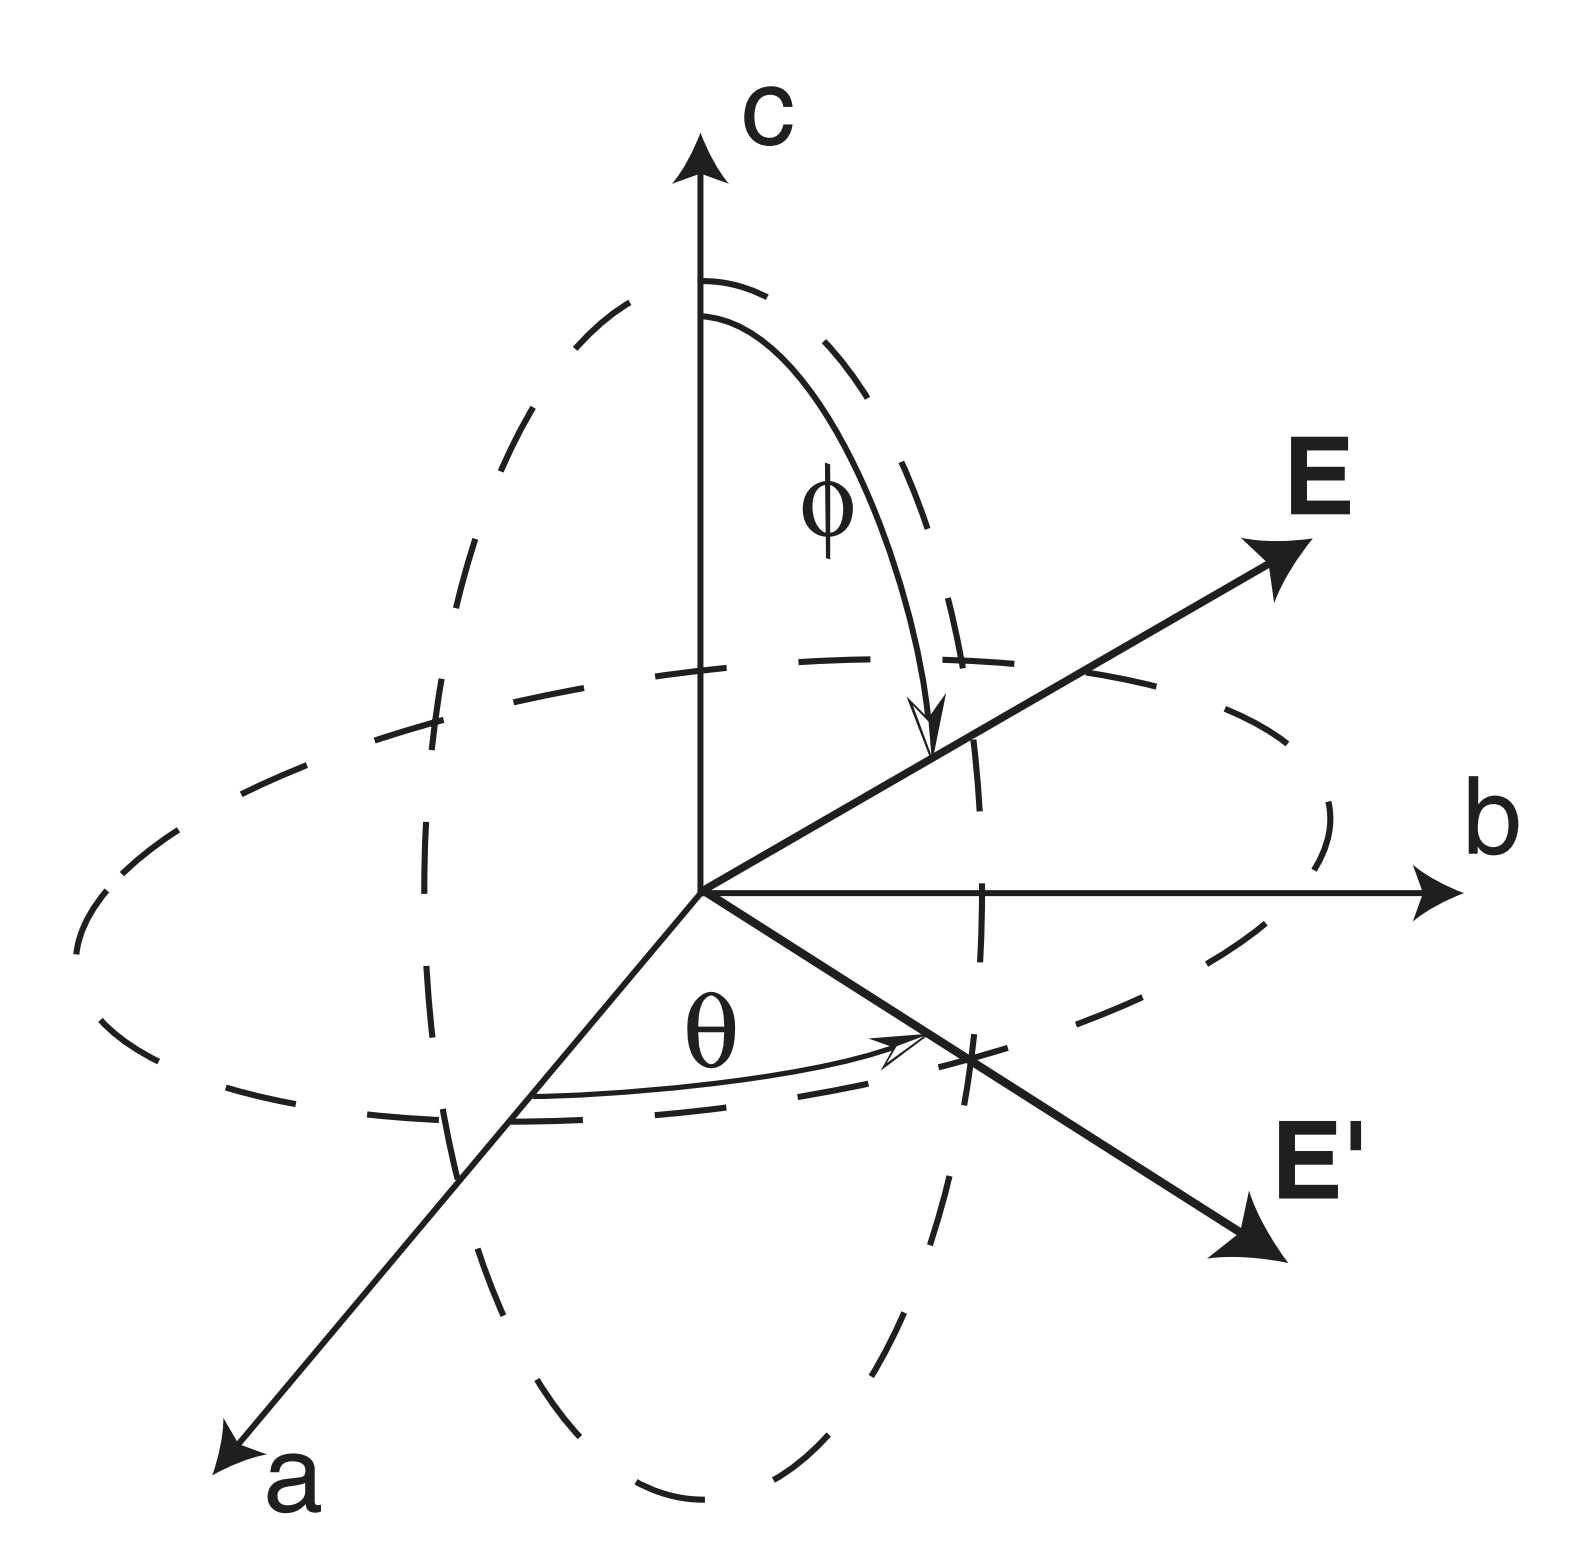

FIGURE 1. The coordinate system in which the orientation of the polarization vector E of FTIR measurement is expressed, relative to the a, b, and c axes of an orthorhombic crystal. Vector E' is the projection of E onto the (a-b) plane. Angle $\theta$ is the azimuth of E' in the (a-b) plane, measured from the a-axis, and $\phi$ is the angle between E and the c-axis. By convention, both θ and φ are reported in the domain 0 to 90°, as the optical properties are symmetrical with respect to reflection about the (a-b), (b-c), and (a-c) planes.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.spatial.transform import Rotation as r
from scipy.optimize import curve_fit


In [32]:
Ta = 90 # x // [100]
Tb = 50 # y // [010]
Tc = 20 # z // [001]

# Genereting the absorbance figure
## POLAR COORDINATES
generate a matrix containing lineary distributed values of azimuth and elevation elevation for the function sph2car

azimuth (phi) is the counterclockwise angle in the x-y plane measured in radians from the positive x-axis.

elevation (theta) is the angle in radians from the vertical z-direction.



## Transmition along any direction given in polar coordinates

In [33]:
# phi is measured from the z (vertical) direction
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# T is the magnitud of the vector (rho) in polar coordinates
T = Ta * np.cos(theta)**2 * np.sin(phi)**2 + \
    Tb * np.sin(theta)**2 * np.sin(phi)**2 + \
    Tc * np.cos(phi)**2;


In [34]:
# Express the mesh in the cartesian coordinates
x = T * np.sin(phi) * np.cos(theta)
y = T * np.sin(phi) * np.sin(theta)
z = T * np.cos(phi)

# normalize colors to max and min values
Tmax, Tmin = T.max(), T.min()
Tcolors = (T - Tmin) / (Tmax - Tmin)

Text(0.5, 0, '$z$')

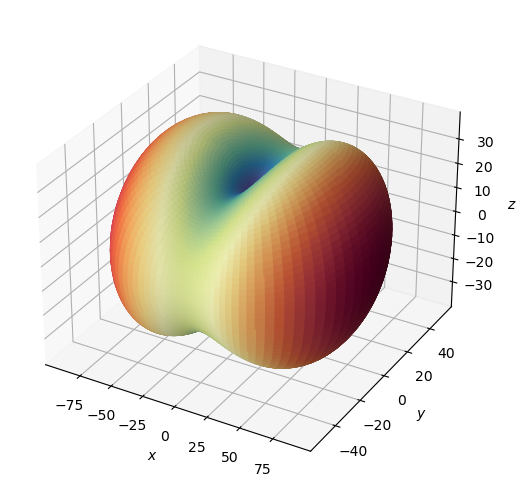

In [35]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.plot_surface(x, y, z, vmax=T.max(), vmin=Tmin, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

#ax.set_box_aspect((1, 1, 1)) # ensure equal aspect ratio

In [36]:
#Show the same figure in an interactive window (you can use "osx" in mac instead of qt I think)
%matplotlib qt

fig3, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors), alpha=0.5, antialiased=True)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

plt.show()

## Try t make a rotation using scipy Rotation from spatial.transform

for details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html

In [37]:
from scipy.spatial.transform import Rotation as r

#define a rotation in euler space
rotation = r.from_euler('z', 45, degrees=True)
rotation.as_euler('zxy', degrees=True)

array([45.,  0.,  0.])

In [38]:
# convert this rotation to (rotation) matrix, just checking
rotation.as_matrix()

array([[ 0.70710678, -0.70710678,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [39]:
rotation.as_matrix().T

array([[ 0.70710678,  0.70710678,  0.        ],
       [-0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [40]:
# store the differenet coordinates in a 3D numpy array (100 x 100 x 3)
# third dimension (index 2) are x, y, and z respectively
coordinates = np.dstack((x,y,z))
coordinates.shape

(100, 100, 3)

In [41]:
# rotate all the coordinates using the rotation matrix
# this means multiplying the inverse of the rotation matrix
# using the matrix multiplication operator @
new_coordinates = coordinates @ rotation.as_matrix().T

Text(0.5, 0, '$z$')

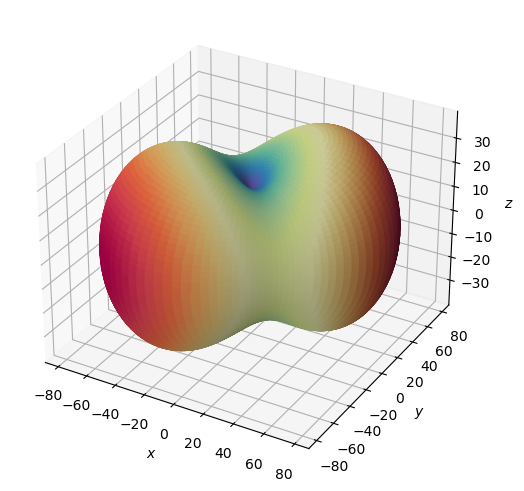

In [42]:
# back to inline plotting backend
%matplotlib inline 

# make figure
fig4, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.plot_surface(new_coordinates[:,:,0], new_coordinates[:,:,1], new_coordinates[:,:,2], rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

In [43]:
#define a rotation in euler space
new_rotation = r.from_euler('zxz', [30, 45, 60], degrees=True)

# apply new rotation
new_coordinates = coordinates @ new_rotation.as_matrix().T

Text(0.5, 0, '$z$')

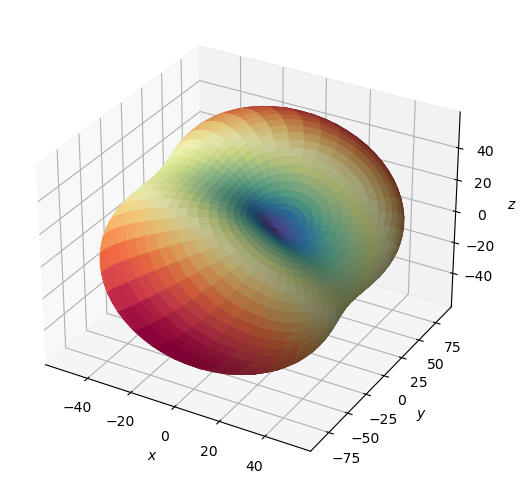

In [45]:
fig5, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.plot_surface(new_coordinates[:,:,0], new_coordinates[:,:,1], new_coordinates[:,:,2], facecolors=cm.Spectral_r(Tcolors))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

In [61]:
def sph2cart(phi, theta, T):
    """ TODO
    """
    
    x = T * np.sin(phi) * np.cos(theta)
    y = T * np.sin(phi) * np.sin(theta)
    z = T * np.cos(phi)
    
    return x, y, z
    

def generate_T_mesh(density=50):
    """ TODO
    """
    
    # generate the mesh
    phi, theta = np.meshgrid(np.linspace(0, np.pi, density), \
                             np.linspace(0, 2*np.pi, density))
    
    # set olivine Ta, Tb, and Tc values
    Ta, Tb, Tc = 90, 50, 20
    
    # estimate T values
    T = Ta * np.cos(theta)**2 * np.sin(phi)**2 + \
        Tb * np.sin(theta)**2 * np.sin(phi)**2 + \
        Tc * np.cos(phi)**2;
    
    # # Express the mesh in the cartesian coordinates
    x, y, z = sph2cart(phi, theta, T)
    
    return np.dstack((x,y,z))

def func(T, a, b, c):
    """ Comment...TODO
    """
    
    # generate the rotation in euler space (Bunge convention)
    rotation = r.from_euler('zxz', [a, b, c], degrees=True)
    
    return T @ rotation.as_matrix().T

In [53]:
# generate 20 points
T_obs = generate_T_mesh(density=10)
x = T[:, :, 0]
y = T[:, :, 1]
z = T[:, :, 2]

T.shape, x.shape

((10, 10, 3), (10, 10))

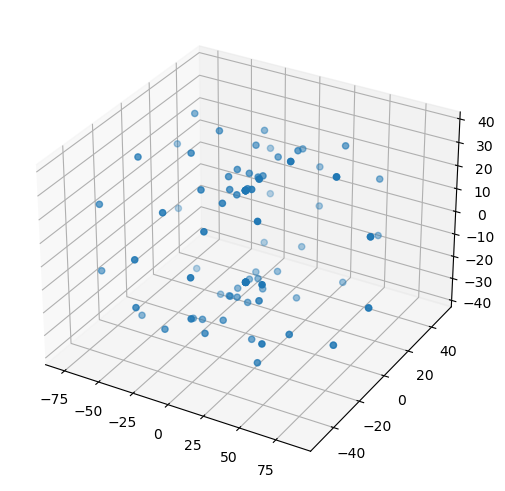

In [54]:
fig6, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.scatter(x, y, z)

In [64]:
curve_fit(func, T, p0=(1, 1, 1))

TypeError: curve_fit() missing 1 required positional argument: 'ydata'

In [63]:
p = func(T, 45, 0, 0)
p.shape, type(p) 

((10, 10, 3), numpy.ndarray)

In [58]:
T.shape

(10, 10, 3)

In [60]:
rotation = r.from_euler('zxz', [45, 0, 0], degrees=True)
T @ rotation.as_matrix().T

array([[[ 0.00000000e+00,  0.00000000e+00,  2.00000000e+01],
        [ 6.81722767e+00,  6.81722767e+00,  2.64884733e+01],
        [ 2.22361445e+01,  2.22361445e+01,  3.74766666e+01],
        [ 4.43970016e+01,  4.43970016e+01,  3.62500000e+01],
        [ 6.12029250e+01,  6.12029250e+01,  1.52618067e+01],
        [ 6.12029250e+01,  6.12029250e+01, -1.52618067e+01],
        [ 4.43970016e+01,  4.43970016e+01, -3.62500000e+01],
        [ 2.22361445e+01,  2.22361445e+01, -3.74766666e+01],
        [ 6.81722767e+00,  6.81722767e+00, -2.64884733e+01],
        [ 1.73191211e-15,  1.73191211e-15, -2.00000000e+01]],

       [[ 0.00000000e+00,  0.00000000e+00,  2.00000000e+01],
        [ 7.82640236e-01,  8.94561884e+00,  2.46717693e+01],
        [ 2.35820211e+00,  2.69543735e+01,  3.22456760e+01],
        [ 4.53664961e+00,  5.18541423e+01,  3.00523613e+01],
        [ 6.16791021e+00,  7.04995363e+01,  1.24784547e+01],
        [ 6.16791021e+00,  7.04995363e+01, -1.24784547e+01],
        [ 4.53664961e+